In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode , download_plotlyjs , iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

In [3]:
credit_train.shape

(100514, 19)

In [4]:
credit_test.shape

(10353, 18)

In [5]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [6]:
credit_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
credit_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [8]:
credit_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


# Basic Analysis

In [9]:
#We need to convert the values of years in current job into integer format.
credit_train['Years in current job'] = credit_train['Years in current job'].map({'8 years': 8 , '10+ years': 15 ,  
                                                                                 '3 years': 3 , '5 years': 5 , '< 1 year' : 0.5 , 
                                                                                 '2 years': 2, '4 years': 4 , '9 years': 9 , '7 years':7 ,'1 year': 1 , '6 years': 6})
credit_test['Years in current job'] = credit_test['Years in current job'].map({'8 years': 8 , '10+ years': 15 ,  
                                                                                 '3 years': 3 , '5 years': 5 , '< 1 year' : 0.5 , 
                                                                                 '2 years': 2, '4 years': 4 , '9 years': 9 , '7 years':7 ,'1 year': 1 , '6 years': 6})
#Run it one time on the secons time the all values become NaN.

In [10]:
credit_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,15.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [11]:
credit_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,15.0,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,15.0,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2.0,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,15.0,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,15.0,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


# Let Check the Null value in the dataset

In [12]:
temp_df = credit_train.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0] / len(credit_train)) * 100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(credit_train)}")
temp_df

The length of dataset is 	 100514


,Column Name,Number of null values,Null values in percentage
0,Loan ID,514,0.511372
1,Customer ID,514,0.511372
2,Loan Status,514,0.511372
3,Current Loan Amount,514,0.511372
4,Term,514,0.511372
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
8,Home Ownership,514,0.511372
9,Purpose,514,0.511372


In [13]:
#50% of data in Months since last delinquest column is fill with null values.
#We can remove this column but now we are removing this column.
#We will fill these values later with it's mean values.

In [14]:
# Lets remove unwanted columns
credit_train.drop(labels = ['Loan ID' , 'Customer ID'] , axis = 1 , inplace = True)
credit_test.drop(labels = ['Loan ID' , 'Customer ID'] , axis = 1 , inplace = True)

In [15]:
credit_train

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,15.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,15.0,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,0.5,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,Charged Off,648714.0,Long Term,NaN,NaN,0.5,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,Fully Paid,215952.0,Short Term,739.0,1454735.0,0.5,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


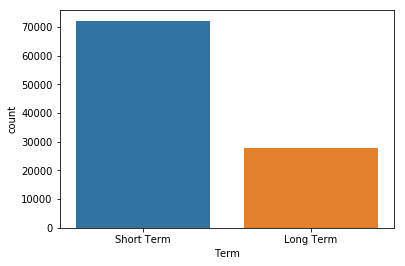

In [16]:
# Let us deal with the missing value in categorical data
# 1. With "Term" Column
sns.countplot(data = credit_train , x = 'Term')

In [17]:
#As maximum are from 'Short Term' then we will replace the missing values with the 'Short Term' .

In [18]:
credit_train['Term'].fillna(value = 'Short Term' , inplace = True)
credit_test['Term'].fillna(value = 'Short Term' , inplace = True)

In [19]:
#  With 'Home Ownership' coulmn

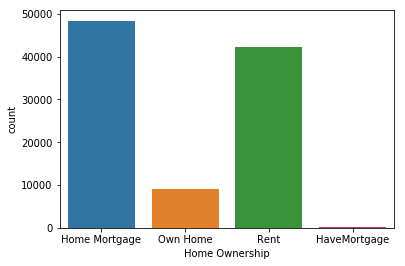

In [20]:
sns.countplot(data = credit_train , x = 'Home Ownership')

In [21]:
# Here Home Mortage and Rent values are at the same number of count.
# So we willl replace it by Home Mortgage.

In [22]:
credit_train['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [23]:
credit_train['Home Ownership'].fillna(value = 'Home Mortage' , inplace = True)
credit_test['Home Ownership'].fillna(value = 'Home Mortage' , inplace = True)

In [24]:
# With 'Purpose column'

In [25]:
credit_train['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

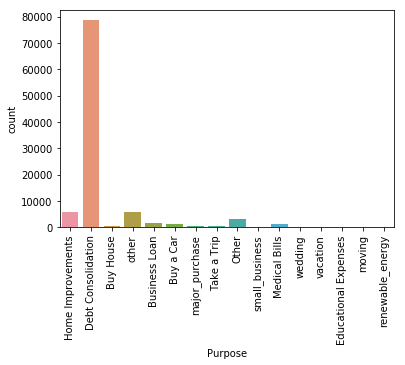

In [26]:
sns.countplot(data = credit_train , x = 'Purpose')
plt.xticks(rotation = 90)  # to ratate the names in x axis to overcome overlapping in axis 
plt.show()

In [27]:
credit_train['Purpose'].fillna(value = 'Debt Consolidation' , inplace = True)
credit_test['Purpose'].fillna(value = 'Debt Consolidation' , inplace = True)

In [28]:
# With 'Loan column Status'

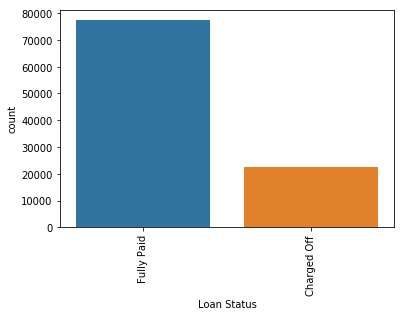

In [29]:
sns.countplot(data = credit_train , x = 'Loan Status')
plt.xticks(rotation = 90)
plt.show()

In [30]:
#credit_train['Loan Status'].fillna(value = 'Fully Paid' , inplace = True)
#credit_test['Loan Status'].fillna(value = 'Fully Paid' , inplace = True)

In [31]:
# Let us plot the same graph but inter-active this time with the help of plotly.

In [32]:
count = credit_train['Loan Status'].value_counts().reset_index()
count.iplot(kind = 'bar' ,x = 'index' , y = 'Loan Status' , xTitle = "Loan Status" , yTitle = "Frequency" , color = 'deepskyblue'
           , title = "Fully Paid vs Charged Off")

In [33]:
credit_train['Loan Status'].fillna(value = 'Fully Paid' , inplace = True)

# Prediction with ML Predictions

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder , OneHotEncoder   #TO deal with categorical data in Target Vector
from sklearn.model_selection import cross_val_score  # TO check the Accurecy of the model
from sklearn.preprocessing import Imputer  # To deal with the missing value
from sklearn.preprocessing import StandardScaler #To apply scaling to the dataset
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# Convert dataframe into array

In [36]:
X_train = credit_train.drop(labels = 'Loan Status' , axis = 1).values
y_train = credit_train['Loan Status'].values
X_test = credit_test.values

In [37]:
# Now Deal with The missing data

In [38]:
imputer = Imputer()
X_train[:,[0,2,3,4,7,8,9,10,11,12,13,14,15]] = imputer.fit_transform(X_train[: , [0,2,3,4,7,8,9,10,11,12,13,14,15]])
X_test[:,[0,2,3,4,7,8,9,10,11,12,13,14,15]] = imputer.fit_transform(X_test[:,[0,2,3,4,7,8,9,10,11,12,13,14,15]])

In [39]:
# Let us deal with the categorical value in the dataset and training set

In [40]:
labelencoder_X = LabelEncoder()
X_train[:, 1] = labelencoder_X.fit_transform(X_train[:,1])
X_train[:, 5] = labelencoder_X.fit_transform(X_train[:,5])
X_train[:, 6] = labelencoder_X.fit_transform(X_train[:,6])
# this is need to come when we have more than two categorical data
onehotencoder_X = OneHotEncoder(categorical_features = [1 , 5 , 6])
X_train = onehotencoder_X.fit_transform(X_train).toarray()

In [41]:
# Lets apply same on test set

In [42]:
X_test[:, 1 ] = labelencoder_X.fit_transform(X_test[:,1 ])
X_test[:, 5 ] = labelencoder_X.fit_transform(X_test[:,5 ])
X_test[:, 6 ] = labelencoder_X.fit_transform(X_test[:,6 ])

onehotencoder_X = OneHotEncoder(categorical_features=[1,5,6]) 
X_test = onehotencoder_X.fit_transform(X_test).toarray()

In [43]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [44]:
# Lets apply scaling o the dataset
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [45]:
# Dimensionally Reduction
# We are doing this to reduce the number of dimensions/features in the dataset.
# The features which have less effect on the prediction , we will remove those features.
# It also boosts the process.
# It saves time.
# Here we will use Principal Component Analysis (PCA) with 'rbf' kernel.

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.23260481e-02, 5.73095470e-02, 5.37848849e-02, 5.17398442e-02,
       4.44650280e-02, 4.23249838e-02, 3.38796173e-02, 3.07922699e-02,
       3.02298226e-02, 3.00748171e-02, 2.87904505e-02, 2.86895304e-02,
       2.84641125e-02, 2.83156554e-02, 2.82050487e-02, 2.79431460e-02,
       2.79026369e-02, 2.78719417e-02, 2.78035250e-02, 2.76772972e-02,
       2.76096572e-02, 2.74433016e-02, 2.72109226e-02, 2.66574861e-02,
       2.56596746e-02, 2.47078787e-02, 2.39864919e-02, 2.14270631e-02,
       2.05975278e-02, 1.40391273e-02, 1.10581236e-02, 9.44781206e-03,
       1.56472639e-03, 2.04799939e-31, 1.21723024e-31, 1.55266002e-35])

In [47]:
# here we will take n_variance = 25

In [48]:
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

# Apply Logistic Regression

In [49]:
classifier_Logi = LogisticRegression()
classifier_Logi.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
accuracy = cross_val_score(estimator = classifier_Logi , X = X_train , y = y_train , cv = 10)
print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Logistic Regressor Model is 	 0.8149405021415467
The deviation in the accuracy is 	 0.01584315442847773


# Apply Random Forest

In [51]:
classifier_ran = RandomForestClassifier()
classifier_ran.fit(X_train , y_train)
accuracy = cross_val_score(estimator = classifier_ran , X = X_train , y = y_train , cv = 10)
print(f"The Accuracy of the Random Forest Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The Accuracy of the Random Forest Model is 	 0.7915308493445716
The deviation in the accuracy is 	 0.015512230496401581


In [52]:
# In Logistic Regression we are getting the accuracy of 82% .
# Here deviation in the accuracy is 2%, means if we predict on new values then our accuracy will lies in range of 80% to 84% .
# It also indicates that the problem is Linear.
# By this We can eliminate all other models.

In [53]:
print(np.unique(y_train))
print(y_train[:10])
print("here 1 indicates 'Fully paid and 0 indicates 'charged off")


[0 1]
[1 1 1 1 1 0 1 0 1 1]
here 1 indicates 'Fully paid and 0 indicates 'charged off


In [54]:
# Let us predict on test set

In [56]:
y_pred = classifier_Logi.predict(X_test)
# Let us convert 1 and 0 into Fully Paid and Charged off respectively
y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:5]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid'], dtype='<U11')

# KNN classifier

In [63]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)
accuracy = cross_val_score(estimator=knn , X = X_train , y = y_train , cv = 10)
print("Accuracy of KNN classifier in training set.{}".format(accuracy.mean()))
print(f"The deviation in the accuracy is \t {accuracy.std()}")

Accuracy of KNN classifier in training set.0.7945958110558622
The deviation in the accuracy is 	 0.003297521570736683


# ------------------------------COMPLETED--------------------------------------------------